In [9]:
from PIL import Image
from IPython.display import display
import random
import sys

image = Image.open("/content/drive/MyDrive/lenna.jpg")
color_image = image.convert('CMYK')#separating the image into these color components allows for the creation of shares that represent individual color channels.
#Opens the original image (lenna.jpg), converts it to CMYK color mode
color_image.save('color_image.jpg')

bw_image = image.convert('1')
#When you convert an image to mode '1', it means you're turning the image into a black-and-white
#format where each pixel can only be completely black or completely white.
bw_image.save('bw_image.jpg')

outfile1 = Image.new("CMYK", [dimension for dimension in image.size])
outfile2 = Image.new("CMYK", [dimension for dimension in image.size])
outfile3 = Image.new("CMYK", [dimension for dimension in image.size])
#image.size would returns a tuple of the form (width,height) -> of original image
# the line "[dimension for dimension in image.size]" iterates over each element in the tuple and
#creates a new list with those elements ie, [width,height].
#This list is then used as an argument for creating a new image, ensuring that the new image
#has the same dimensions as the original image. "CMYK" represents the mode of the new image.

#'image.size' is an attribute of the Image object in the Python Imaging Library (PIL) or its fork, Pillow.
#When you open an image using Image.open("/content/drive/MyDrive/lenna.jpg"), it creates an Image object
#that encapsulates the properties and methods of that specific image file.

for x in range(0, image.size[0], 1):
    for y in range(0, image.size[1], 1):
        sourcepixel = image.getpixel((x, y))
        outfile1.putpixel((x, y),(sourcepixel[0],0,0,0))
        outfile2.putpixel((x, y),(0,sourcepixel[1],0,0))
        outfile3.putpixel((x, y),(0,0,sourcepixel[2],0))
#Iterates through each pixel of the original image and separates its color channels into the three new CMYK images.
#The outer loop (for x in range(0, image.size[0], 1):) iterates over the x-coordinates of the image pixels.
#The inner loop (for y in range(0, image.size[1], 1):) iterates over the y-coordinates of the image pixels
#sourcepixel = image.getpixel((x, y)) retrieves the color information (CMYK values) of the pixel at the
#current x, y coordinates in the original image. it is a tuple (C,M,Y,K)
#outfile1.putpixel((x, y), (sourcepixel[0], 0, 0, 0)): This sets the CMYK values of the current pixel in outfile1 to the
#original pixel's cyan value (sourcepixel[0]) and sets magenta, yellow, and black values to 0.
#outfile2.putpixel((x, y), (0, sourcepixel[1], 0, 0)): This sets the CMYK values of the current pixel in outfile2 to the
#original pixel's magenta value (sourcepixel[1]) and sets cyan, yellow, and black values to 0.
#outfile3.putpixel((x, y), (0, 0, sourcepixel[2], 0)): This sets the CMYK values of the current pixel in outfile3 to the
#original pixel's yellow value (sourcepixel[2]) and sets cyan, magenta, and black values to 0.

outfile1.save('out1.jpg')
outfile2.save('out2.jpg')
outfile3.save('out3.jpg')

#====================================================================
image1 = Image.open("out1.jpg")
image2 = Image.open("out2.jpg")
image3 = Image.open("out3.jpg")

image1 = image1.convert('1')
image2 = image2.convert('1')
image3 = image3.convert('1')
#the code opens the three saved images ('out1.jpg', 'out2.jpg', 'out3.jpg')
#and converts them to grayscale images ('1' mode) using the convert method.
#GRAYSCALE IMAGE:It is an image in which the only colors present
#are shades of gray. Each pixel in a grayscale image is represented by a single value
#that corresponds to the intensity of the light at that pixel.
# The intensity value typically ranges from 0 to 255, where 0 represents black and 255 represents white.

hf1 = Image.new("CMYK", [dimension for dimension in image1.size])
hf2 = Image.new("CMYK", [dimension for dimension in image1.size])
hf3 = Image.new("CMYK", [dimension for dimension in image1.size])
#Three new CMYK images (hf1, hf2, and hf3) are created using the Image.new method.
#The "CMYK" mode indicates that the images will have four channels: Cyan, Magenta, Yellow, and Key (black).

for x in range(0, image1.size[0]):
    for y in range(0, image1.size[1]):
        pixel_color1 = image1.getpixel((x, y))
        pixel_color2 = image2.getpixel((x, y))
        pixel_color3 = image3.getpixel((x, y))
        if pixel_color1 == 255:
            hf1.putpixel((x, y),(255,0,0,0))
        else:
            hf1.putpixel((x, y),(0,0,0,0))
        if pixel_color2 == 255:
            hf2.putpixel((x, y),(0,255,0,0))
        else:
            hf2.putpixel((x, y),(0,0,0,0))
        if pixel_color3 == 255:
            hf3.putpixel((x, y),(0,0,255,0))
        else:
            hf3.putpixel((x, y),(0,0,0,0))
        #For hf1, if the pixel value in image1 is 255 (white), it means that the original pixel was part of an
        #object (foreground), and in the hf1 image, the corresponding pixel is set to (255, 0, 0, 0), indicating full Cyan.
        #If the pixel value is not 255 (black), it means the pixel was part of the background, and in the hf1 image, the
        #corresponding pixel is set to (0, 0, 0, 0).Similar logic is applied for hf2 and hf3,
        #but with different colors for the corresponding channels

hf1.save('hf1.jpg')
hf2.save('hf2.jpg')
hf3.save('hf3.jpg')
#====================================================================

image1 = Image.open("hf1.jpg")
image1 = image1.convert('CMYK')

image2 = Image.open("hf2.jpg")
image2 = image2.convert('CMYK')

image3 = Image.open("hf3.jpg")
image3 = image3.convert('CMYK')
#These binary images are then converted back to CMYK to facilitate the subsequent
#merging of color components in the final stage of the code, where the original color image
# is reconstructed from these separated components.


share1 = Image.new("CMYK", [dimension * 2 for dimension in image1.size])
share2 = Image.new("CMYK", [dimension * 2 for dimension in image2.size])
share3 = Image.new("CMYK", [dimension * 2 for dimension in image3.size])

for x in range(0, image1.size[0]):
    for y in range(0, image1.size[1]):
        pixelcolor = image1.getpixel((x, y))  #pixelcolor is a tuple (C,M,Y,k)

        if pixelcolor[0]+pixelcolor[1]+pixelcolor[2] == 0: #checks if pixel in image1 is black (Cyan, Magenta, Yellow components are all zero).
            share1.putpixel((x * 2, y * 2), (255,0,0,0)) #set C
            share1.putpixel((x * 2 + 1, y * 2), (0,0,0,0))#set White
            share1.putpixel((x * 2, y * 2 + 1), (0,0,0,0))#set white
            share1.putpixel((x * 2 + 1, y * 2 + 1), (255,0,0,0))#set C

        else:
            share1.putpixel((x * 2, y * 2), (0,0,0,0)) #set White
            share1.putpixel((x * 2 + 1, y * 2), (255,0,0,0))#set C
            share1.putpixel((x * 2, y * 2 + 1), (255,0,0,0))#set C
            share1.putpixel((x * 2 + 1, y * 2 + 1), (0,0,0,0))#set White

        pixelcolor = image2.getpixel((x, y))

        if pixelcolor[0]+pixelcolor[1]+pixelcolor[2] == 0:
            share2.putpixel((x * 2, y * 2), (0,255,0,0))
            share2.putpixel((x * 2 + 1, y * 2), (0,0,0,0))#set White
            share2.putpixel((x * 2, y * 2 + 1), (0,0,0,0))#set White
            share2.putpixel((x * 2 + 1, y * 2 + 1), (0,255,0,0))

        else:
            share2.putpixel((x * 2, y * 2), (0,0,0,0))#set White
            share2.putpixel((x * 2 + 1, y * 2), (0,255,0,0))#set M
            share2.putpixel((x * 2, y * 2 + 1), (0,255,0,0))#set M
            share2.putpixel((x * 2 + 1, y * 2 + 1), (0,0,0,0))#set White

        pixelcolor = image3.getpixel((x, y))

        if pixelcolor[0]+pixelcolor[1]+pixelcolor[2] == 0:
            share3.putpixel((x * 2, y * 2), (0,0,255,0))#set Y
            share3.putpixel((x * 2 + 1, y * 2), (0,0,0,0))#set White
            share3.putpixel((x * 2, y * 2 + 1), (0,0,0,0))#set White
            share3.putpixel((x * 2 + 1, y * 2 + 1), (0,0,255,0))#set Y

        else:
            share3.putpixel((x * 2, y * 2), (0,0,0,0))#set White
            share3.putpixel((x * 2 + 1, y * 2), (0,0,255,0))#set Y
            share3.putpixel((x * 2, y * 2 + 1), (0,0,255,0))#set Y
            share3.putpixel((x * 2 + 1, y * 2 + 1), (0,0,0,0))#set White

share1.save('share1.jpg')
share2.save('share2.jpg')
share3.save('share3.jpg')
#==============================================================
infile1 = Image.open("share1.jpg")
infile2 = Image.open("share2.jpg")
infile3 = Image.open("share3.jpg")

outfile = Image.new('CMYK', infile1.size)

for x in range(0,infile1.size[0],2):
    for y in range(0,infile1.size[1],2):

        C = infile1.getpixel((x+1, y))[0]
        M = infile2.getpixel((x+1, y))[1]
        Y = infile3.getpixel((x+1, y))[2]

        outfile.putpixel((x, y), (C,M,Y,0))
        outfile.putpixel((x+1, y), (C,M,Y,0))
        outfile.putpixel((x, y+1), (C,M,Y,0))
        outfile.putpixel((x+1, y+1), (C,M,Y,0))

outfile.save("final.jpg")

In [17]:
hf1.size

(512, 512)

original image:


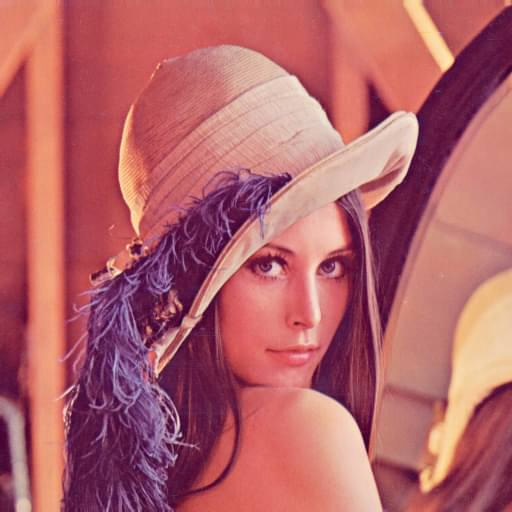

out1:


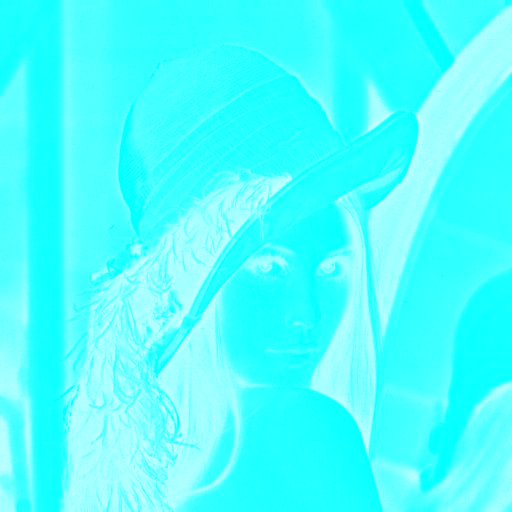

out2:


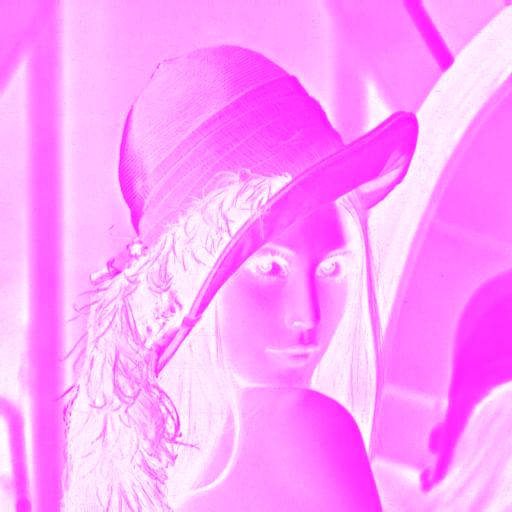

out3:


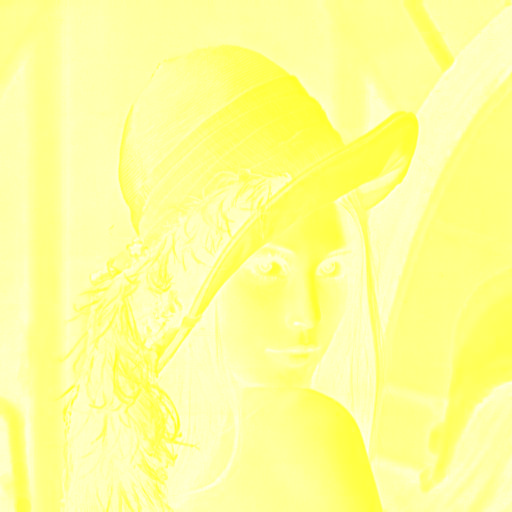

halftone1:


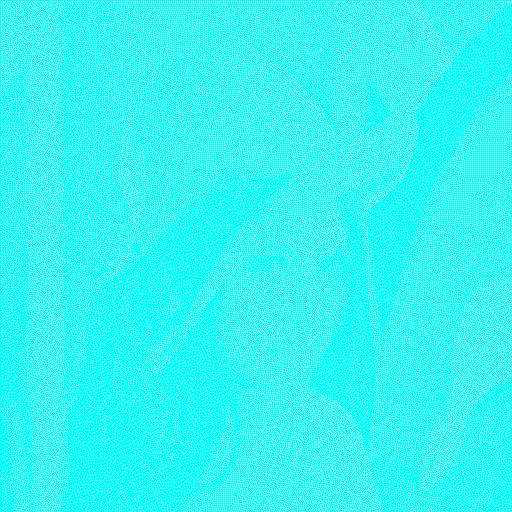

halftone2:


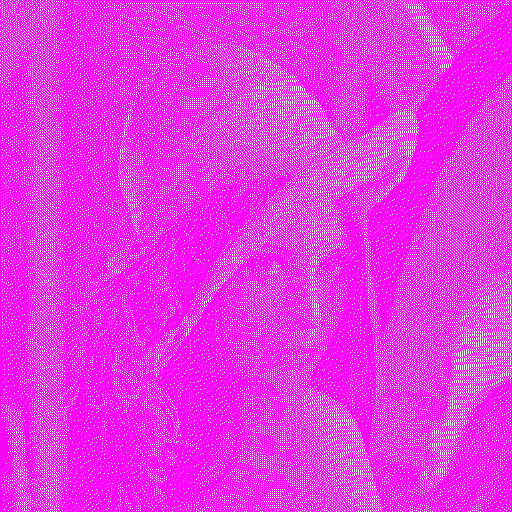

halftone3:


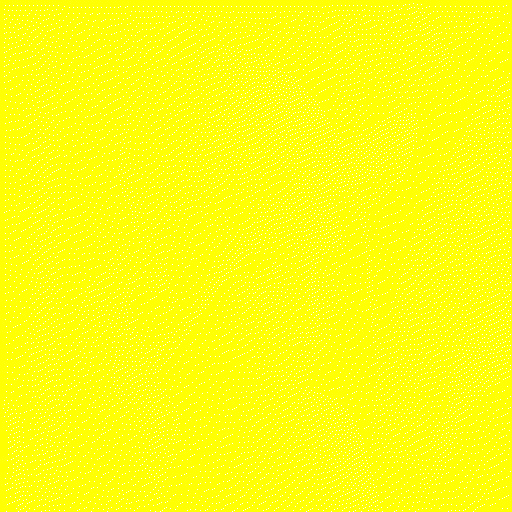

share1:


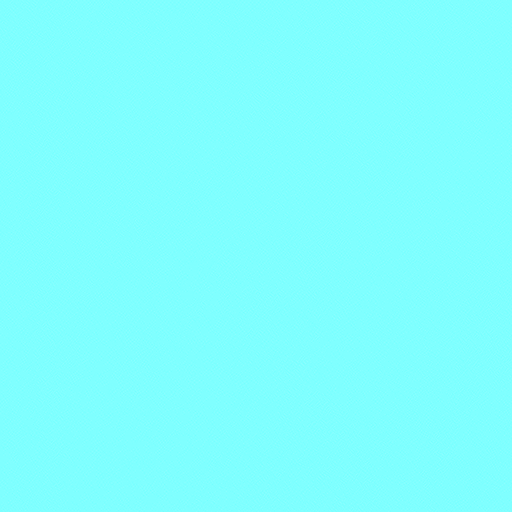

share2:


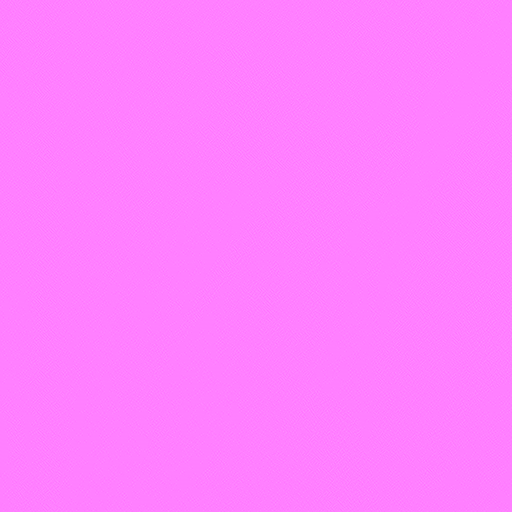

share3:


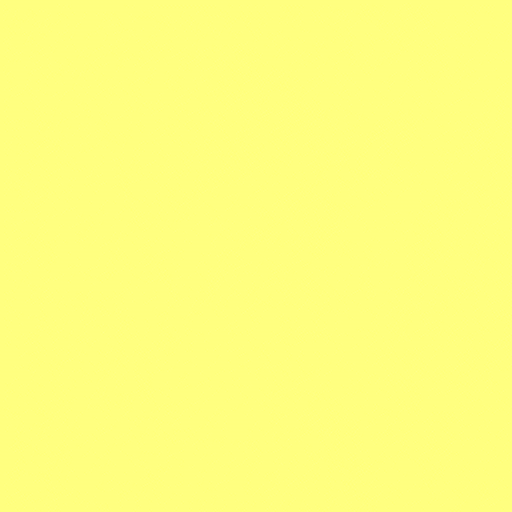

Decrypted Image:


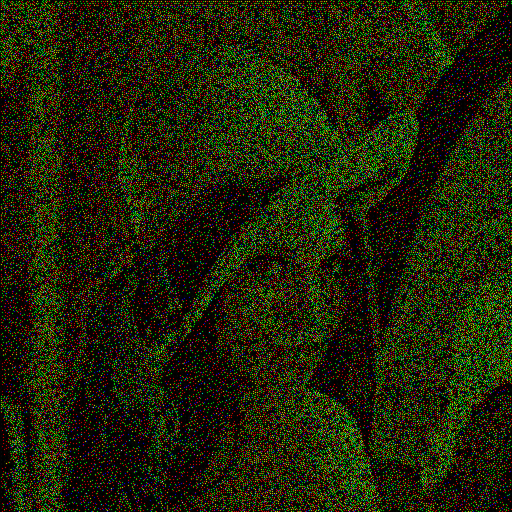

In [19]:
from PIL import Image
from IPython.display import display

def display_jpg_image(image_path):
    image = Image.open(image_path)

    if image.mode == "CMYK":
        image = image.convert("RGB")

    image = image.resize((512, 512))

    display(image)

print("original image:")
display_jpg_image("color_image.jpg")

print("out1:")
display_jpg_image("out1.jpg")
print("out2:")
display_jpg_image("out2.jpg")
print("out3:")
display_jpg_image("out3.jpg")

print("halftone1:")
display_jpg_image("hf1.jpg")
print("halftone2:")
display_jpg_image("hf2.jpg")
print("halftone3:")
display_jpg_image("hf3.jpg")

print("share1:")
display_jpg_image("share1.jpg")
print("share2:")
display_jpg_image("share2.jpg")
print("share3:")
display_jpg_image("share3.jpg")

print("Decrypted Image:")
display_jpg_image("final.jpg")




In [2]:
from PIL import Image
from IPython.display import display
from ipywidgets import Layout, Button, VBox, HTML, Output, HBox

# Define the image paths
image_paths = {
    "Original Image": '/content/drive/MyDrive/lenna.jpg',
    "out1": 'out1.jpg',
    "out2": 'out2.jpg',
    "out3": 'out3.jpg',
    "hf1": 'hf1.jpg',
    "hf2": 'hf2.jpg',
    "hf3": 'hf3.jpg',
    "share1": 'share1.jpg',
    "share2": 'share2.jpg',
    "share3": 'share3.jpg',
    "Decrypted Image": 'final.jpg'
}

# Create a function to display images using IPython.display
def display_images(image_key):
    with output_widget:
        output_widget.clear_output()
        path = image_paths[image_key]
        img = Image.open(path)
        img = img.convert('RGB')
        display(img)
        display(HTML(f"<p>{image_key}</p>"))

# Create buttons for each image
display_buttons = {}
button_width = '120px'  # Set the button width here
for image_key in image_paths:
    button = Button(description=f"{image_key}", layout=Layout(width=button_width))
    button.on_click(lambda change, key=image_key: display_images(key))
    display_buttons[image_key] = button

# Create an output widget for displaying images
output_widget = Output()

# Create a HBox to arrange buttons and images side by side
buttons = [display_buttons[key] for key in image_paths]
buttons_vbox = VBox(buttons)
hbox = HBox([buttons_vbox, output_widget])

# Create the GUI layout
gui = hbox

# Display the GUI
display(gui)


In [3]:
from PIL import Image
from IPython.display import display
from ipywidgets import Layout, Button, VBox, HTML, Output, HBox

# Define the image paths
image_paths = {
    "Original Image": '/content/drive/MyDrive/lenna.jpg',
    "out1": 'out1.jpg',
    "out2": 'out2.jpg',
    "out3": 'out3.jpg',
    "hf1": 'hf1.jpg',
    "hf2": 'hf2.jpg',
    "hf3": 'hf3.jpg',
    "share1": 'share1.jpg',
    "share2": 'share2.jpg',
    "share3": 'share3.jpg',
    "Decrypted Image": 'final.jpg'
}

# Load and process the color_image
color_image_path = '/content/drive/MyDrive/lenna.jpg'
color_image = Image.open(color_image_path)
color_image = color_image.convert('RGB')

# Create a function to display images using IPython.display
def display_images(image_key):
    with output_widget:
        output_widget.clear_output()
        path = image_paths[image_key]
        img = Image.open(path)
        img = img.convert('RGB')
        display(img)
        display(HTML(f"<p>{image_key}</p>"))

# Create buttons for each image
display_buttons = {}
button_width = '120px'  # Set the button width here
for image_key in image_paths:
    button = Button(description=f"{image_key}", layout=Layout(width=button_width))
    button.on_click(lambda change, key=image_key: display_images(key))
    display_buttons[image_key] = button

# Create an output widget for displaying images
output_widget = Output()

# Create a HBox to arrange buttons and images side by side
buttons = [display_buttons[key] for key in image_paths]
buttons_vbox = VBox(buttons)
hbox = HBox([buttons_vbox, output_widget])

# Create the GUI layout
gui = hbox

# Display the GUI
display(gui)

# Display the color_image initially
display_images("Original Image")


In [4]:
import cv2
from skimage.metrics import structural_similarity as ssim

# Load the two images
img1 = cv2.imread("share2.jpg")
img2 = cv2.imread("/content/drive/MyDrive/lenna.jpg")

# Resize images to a common size
width_common = 500
height_common = 500

img1_resized = cv2.resize(img1, (width_common, height_common))
img2_resized = cv2.resize(img2, (width_common, height_common))

# Convert images to grayscale
img1_gray = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

# Calculate Structural Similarity Index (SSI)
ssi_index, _ = ssim(img1_gray, img2_gray, full=True)

print(f"Structural Similarity Index: {ssi_index}")

# You can also calculate Mean Squared Error (MSE)
mse = ((img1_resized - img2_resized) ** 2).mean()

print(f"Mean Squared Error: {mse}")


Structural Similarity Index: 0.10514750629354375
Mean Squared Error: 106.13072266666667
